# Семинар 1
**План семинара:**
1. Получение информации об оборудовании
2. Библиотека Pytorch
  - установка (Windows/Linux(Google Colab); CPU/GPU)
  - обзор возможностей и особенностей
  - запуск простейших примеров
3. Введение в глубокое обучение
  - перцептрон (решение практических задач)

# Получение информации об оборудовании

**Windows** - GUI\
**Linux** (Google colab) - terminal

In [ ]:
# версия Linux
!cat /proc/version

Linux version 5.10.133+ (builder@b1018906abc3) (Chromium OS 12.0_pre422132_p20210405-r10 clang version 13.0.0 (/var/tmp/portage/sys-devel/llvm-12.0_pre422132_p20210405-r10/work/llvm-12.0_pre422132_p20210405/clang cd442157cff4aad209ae532cbf031abbe10bc1df), LLD 13.0.0 (/var/tmp/portage/sys-devel/llvm-12.0_pre422132_p20210405-r10/work/llvm-12.0_pre422132_p20210405/lld cd442157cff4aad209ae532cbf031abbe10bc1df)) #1 SMP Fri Aug 26 08:44:51 UTC 2022


In [ ]:
# версия дистрибутива Linux
!lsb_release -a

No LSB modules are available.

Distributor ID:	Ubuntu

Description:	Ubuntu 18.04.6 LTS

Release:	18.04

Codename:	bionic


In [ ]:
# видеокарта
!nvidia-smi

Thu Dec  1 07:23:50 2022       

+-----------------------------------------------------------------------------+

| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |

|-------------------------------+----------------------+----------------------+

| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |

| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |

|                               |                      |               MIG M. |

|===============================+======================+======================|

|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |

| N/A   54C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |

|                               |                      |                  N/A |

+-------------------------------+----------------------+----------------------+

                                                                            

CUDA Version в nvidia-smi - это не ваша текущая версия CUDA, а [максимально поддерживаемая версия](https://docs.nvidia.com/cuda/cuda-toolkit-release-notes/index.html) для текущего драйвера видеокарты.

In [ ]:
# cuda compiler
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver

Copyright (c) 2005-2021 NVIDIA Corporation

Built on Sun_Feb_14_21:12:58_PST_2021

Cuda compilation tools, release 11.2, V11.2.152

Build cuda_11.2.r11.2/compiler.29618528_0


In [ ]:
# процессор
!cat /proc/cpuinfo

processor	: 0

vendor_id	: GenuineIntel

cpu family	: 6

model		: 85

model name	: Intel(R) Xeon(R) CPU @ 2.00GHz

stepping	: 3

microcode	: 0x1

cpu MHz		: 2000.162

cache size	: 39424 KB

physical id	: 0

siblings	: 2

core id		: 0

cpu cores	: 1

apicid		: 0

initial apicid	: 0

fpu		: yes

fpu_exception	: yes

cpuid level	: 13

wp		: yes

flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities

bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds s

In [ ]:
# процессор
!lscpu

Architecture:        x86_64

CPU op-mode(s):      32-bit, 64-bit

Byte Order:          Little Endian

CPU(s):              2

On-line CPU(s) list: 0,1

Thread(s) per core:  2

Core(s) per socket:  1

Socket(s):           1

NUMA node(s):        1

Vendor ID:           GenuineIntel

CPU family:          6

Model:               85

Model name:          Intel(R) Xeon(R) CPU @ 2.00GHz

Stepping:            3

CPU MHz:             2000.162

BogoMIPS:            4000.32

Hypervisor vendor:   KVM

Virtualization type: full

L1d cache:           32K

L1i cache:           32K

L2 cache:            1024K

L3 cache:            39424K

NUMA node0 CPU(s):   0,1

Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3

In [ ]:
# оперативная память
!grep MemTotal /proc/meminfo

MemTotal:       13297228 kB


In [ ]:
# диск
!df -h # human-readable

Filesystem      Size  Used Avail Use% Mounted on

overlay          79G   23G   56G  29% /

tmpfs            64M     0   64M   0% /dev

shm             5.7G     0  5.7G   0% /dev/shm

/dev/root       2.0G  1.1G  910M  54% /sbin/docker-init

tmpfs           6.4G   48K  6.4G   1% /var/colab

/dev/sda1        75G   41G   35G  55% /opt/bin/.nvidia

tmpfs           6.4G     0  6.4G   0% /proc/acpi

tmpfs           6.4G     0  6.4G   0% /proc/scsi

tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
!du -h | sort -h

8.0K	./.config/configurations

72K	./.config/logs/2022.11.23

76K	./.config/logs

108K	./.config

55M	.

55M	./sample_data


In [ ]:
# права в Google Colab
!whoami

root


# Библиотека Pytorch

## Установка

Ссылки для установки под ваше оборудование можно найти [тут](https://pytorch.org/get-started/locally/).

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
!python --version

Python 3.7.12


In [ ]:
!python -m pip list | grep torch

torch                         1.12.1+cu113

torchaudio                    0.12.1+cu113

torchsummary                  1.5.1

torchtext                     0.13.1

torchvision                   0.13.1+cu113


## Обзор возможностей и особенностей

## Тензоры

In [ ]:
a = torch.Tensor([1,2,3]) # = FloatTensor
a

tensor([1., 2., 3.])

In [ ]:
b = torch.tensor([1,2,3])
b

tensor([1, 2, 3])

Типы данных

In [ ]:
a.dtype, b.dtype

(torch.float32, torch.int64)

Перевод данных в другой тип

In [ ]:
c = b.float()

print(c, c.dtype)

print(c.int(), c.int().dtype)
print(c.long(), c.long().dtype)
print(c.double(), c.double().dtype)

tensor([1., 2., 3.]) torch.float32

tensor([1, 2, 3], dtype=torch.int32) torch.int32

tensor([1, 2, 3]) torch.int64

tensor([1., 2., 3.], dtype=torch.float64) torch.float64


In [ ]:
x = torch.rand(2, 3)
print(x) 
print(x.device)
print(x.dtype)

tensor([[0.2027, 0.1924, 0.0747],

        [0.8738, 0.9038, 0.6521]])

cpu

torch.float32


## Воспроизводимость результатов

In [ ]:
# для воспроизводимости результатов
# не изменяйте и не удаляйте этот код
from numpy.random import seed
import random

random.seed(0)
seed(0)
torch.manual_seed(0)

In [ ]:
!pip install pytorch-lightning -qqq

     |████████████████████████████████| 798 kB 31.3 MB/s 

     |████████████████████████████████| 512 kB 72.8 MB/s 

     |████████████████████████████████| 125 kB 75.0 MB/s 

     |████████████████████████████████| 87 kB 5.8 MB/s 



In [ ]:
import pytorch_lightning as pl

In [ ]:
from pytorch_lightning import seed_everything

Function that sets seed for pseudo-random number generators in: pytorch, numpy, python.random

In [ ]:
seed_everything(0, workers=True)                

0

Подробнее можно прочитать [тут](https://pytorch.org/docs/stable/notes/randomness.html).

## CUDA

In [ ]:
# проверка доступности видеокарты, выбор устройства CPU или GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Данные нужно вручную переносить в видеопамять -- метод cuda. Перенос в оперативную память -- cpu. Альтернатива -- использование метода `.to(device)`. По умолчанию данные на cpu.

In [ ]:
d = c.to(device)

In [ ]:
import torch

In [ ]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)

In [ ]:
!nvidia-smi

Thu Dec  1 07:24:09 2022       

+-----------------------------------------------------------------------------+

| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |

|-------------------------------+----------------------+----------------------+

| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |

| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |

|                               |                      |               MIG M. |

|===============================+======================+======================|

|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |

| N/A   55C    P0    28W /  70W |    612MiB / 15109MiB |      2%      Default |

|                               |                      |                  N/A |

+-------------------------------+----------------------+----------------------+

                                                                            

In [ ]:
def allocate_empty_tensor(dim_size):
  a=torch.zeros(4096,dim_size,dtype=torch.float32,device='cuda')

In [ ]:
allocate_empty_tensor(2048)

In [ ]:
torch.cuda.memory_allocated()

512

In [ ]:
torch.cuda.memory_reserved()

35651584

In [ ]:
!nvidia-smi

Thu Dec  1 07:24:09 2022       

+-----------------------------------------------------------------------------+

| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |

|-------------------------------+----------------------+----------------------+

| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |

| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |

|                               |                      |               MIG M. |

|===============================+======================+======================|

|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |

| N/A   55C    P0    28W /  70W |    644MiB / 15109MiB |      0%      Default |

|                               |                      |                  N/A |

+-------------------------------+----------------------+----------------------+

                                                                            

In [ ]:
allocate_empty_tensor(3072)

In [ ]:
torch.cuda.memory_reserved()

85983232

In [ ]:
!nvidia-smi

Thu Dec  1 07:24:09 2022       

+-----------------------------------------------------------------------------+

| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |

|-------------------------------+----------------------+----------------------+

| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |

| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |

|                               |                      |               MIG M. |

|===============================+======================+======================|

|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |

| N/A   55C    P0    28W /  70W |    692MiB / 15109MiB |      0%      Default |

|                               |                      |                  N/A |

+-------------------------------+----------------------+----------------------+

                                                                            

In [ ]:
torch.cuda.empty_cache()
torch.cuda.memory_reserved()

2097152

In [ ]:
!nvidia-smi

Thu Dec  1 07:24:09 2022       

+-----------------------------------------------------------------------------+

| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |

|-------------------------------+----------------------+----------------------+

| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |

| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |

|                               |                      |               MIG M. |

|===============================+======================+======================|

|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |

| N/A   55C    P0    28W /  70W |    612MiB / 15109MiB |      2%      Default |

|                               |                      |                  N/A |

+-------------------------------+----------------------+----------------------+

                                                                            

In [ ]:
allocate_empty_tensor(600000)
torch.cuda.memory_reserved()

9833545728

In [ ]:
!nvidia-smi

Thu Dec  1 07:24:09 2022       

+-----------------------------------------------------------------------------+

| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |

|-------------------------------+----------------------+----------------------+

| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |

| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |

|                               |                      |               MIG M. |

|===============================+======================+======================|

|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |

| N/A   55C    P0    28W /  70W |   9988MiB / 15109MiB |      2%      Default |

|                               |                      |                  N/A |

+-------------------------------+----------------------+----------------------+

                                                                            

In [ ]:
torch.cuda.empty_cache()
torch.cuda.memory_reserved()

2097152

## Точность

In [ ]:
torch.manual_seed(1337)
x = torch.randn(5000, 5000)

def matrix_power(x):
  y = x @ x @ x @ x @ x @ x
  return (y).sum().item()

print(matrix_power(x))
print(matrix_power(x.cuda()))

27654770130944.0

27654807879680.0


In [ ]:
import numpy as np

In [ ]:
print(matrix_power(x.numpy()))
np.linalg.matrix_power(x.numpy(),6).sum()

27654749159424.0


27654760000000.0

Takeaway: numerical precision of floating point computations can vary between libraries, environments and devices, and from the user side, it is often hard to resolve this issue altogether. Usually, this happens due to a different summation order in code or due to inherent nondeterminism of hardware.

However, note that the relative error is small enough, which makes such blatant discrepancies less of a problem in regular deep learning code.


## Нейроны и линейные слои

![alt text](https://drive.google.com/uc?export=view&id=1k96ch-5lAGYrfBk4xgoty93xy-GP2bhr)


![alt text](https://drive.google.com/uc?export=view&id=1ORawq1pZJ7a2z7vUD2PPyLELkOHoAB51)

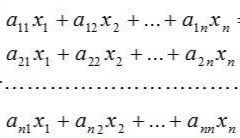

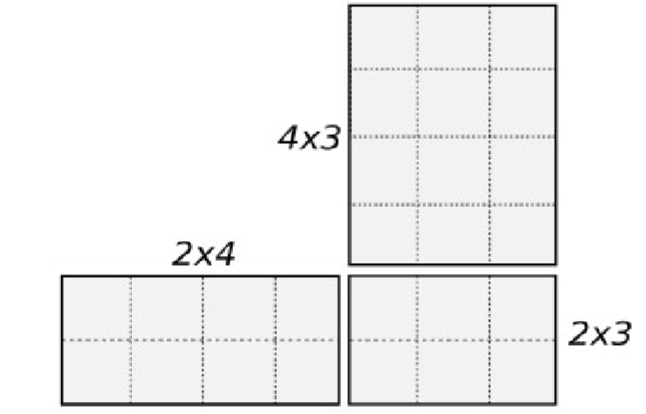

In [ ]:
batch_size = 2 # Количество покупателей
w = 4          # Количество существующих товаров
m = 3          # Количество существующих магазинов

# Матрица покупателей
X = torch.rand(batch_size, w)

# Матрица цен в магазине
W = torch.rand(m,w)

# Цена за топливо
b = torch.rand(m)

print(X.shape, W.shape, b.shape)

print(X)

answer = X @ W.T + b
answer.shape

torch.Size([2, 4]) torch.Size([3, 4]) torch.Size([3])

tensor([[0.5997, 0.7686, 0.8438, 0.6866],

        [0.9745, 0.5593, 0.4227, 0.4468]])


torch.Size([2, 3])

In [ ]:
linear = torch.nn.Linear(4, 3)
out = linear(X)
out.shape

torch.Size([2, 3])

In [ ]:
linear.weight.data.shape

torch.Size([3, 4])

### Встроенные слои

In [ ]:
from torch import nn # модуль с базовыми слоями
import torch.nn.functional as F # модуль с базовыми функциями

In [ ]:
dir(nn)[:10]

['AdaptiveAvgPool1d',
 'AdaptiveAvgPool2d',
 'AdaptiveAvgPool3d',
 'AdaptiveLogSoftmaxWithLoss',
 'AdaptiveMaxPool1d',
 'AdaptiveMaxPool2d',
 'AdaptiveMaxPool3d',
 'AlphaDropout',
 'AvgPool1d',
 'AvgPool2d']

Два способа создания нейросети:
  1. на основе готового класса `nn.Sequential` объединяющего отдельные слои
    - данные передаются по сети в том порядке, в каком объявлены слои
    - функции активации задаются как отдельные слои
  2. свой класс для нейросети, на основе `nn.Module`
    - порядок передачи данных можно менять во время обучения, переопределив forward - динамический граф вычислений

Первый способ стоит использовать только как контейнер для ряда слоев. Неросеть нужно наследовать от `nn.Module`.


In [ ]:
net_seq = nn.Sequential(
    nn.Linear(in_features=3, out_features=5),
    nn.Sigmoid(),
    nn.Linear(in_features=5, out_features=2),                                                            
)
net_seq.to(device)
net_seq

Sequential(
  (0): Linear(in_features=3, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=2, bias=True)
)

In [ ]:
# net_seq(x.to(device))
x = torch.rand(10, 3)
print(x.shape)
net_seq(x.to(device))

torch.Size([10, 3])


tensor([[-0.3486,  0.1858],
        [-0.3352,  0.1524],
        [-0.3191,  0.1074],
        [-0.3382,  0.1596],
        [-0.3360,  0.1497],
        [-0.3250,  0.1284],
        [-0.3360,  0.1538],
        [-0.3399,  0.1630],
        [-0.3276,  0.1330],
        [-0.2975,  0.0608]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=3, out_features=5)
        self.fc2 = nn.Linear(in_features=5, out_features=2)

    def forward(self, x):
        x = self.fc1(x)
        return F.sigmoid(self.fc2(x))

In [ ]:
net_model = Model()
net_model.to(device)
net_model

Model(
  (fc1): Linear(in_features=3, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=2, bias=True)
)

In [ ]:
net_model(x.to(device))

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.

  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[0.3925, 0.6320],
        [0.4133, 0.6557],
        [0.3664, 0.6167],
        [0.3909, 0.6431],
        [0.3635, 0.6133],
        [0.4030, 0.6653],
        [0.3920, 0.6437],
        [0.4046, 0.6417],
        [0.4209, 0.6634],
        [0.3932, 0.6557]], device='cuda:0', grad_fn=<SigmoidBackward0>)

### **Задача 1**. Посчитайте количество обучаемых параметров в сети net_seq и net_model.

Обе модели имеют одинаковую логическую структуру сети. Сеть состоит из:  
1-ый слой из 5-ти нейронов. Каждый нейрон содержит 3 входных веса и смещение. Итого (3 + 1) * 5 = 20 параметров.  
2-ой слой из 2-х нейронов. Каждый нейрон содержит 5 входных весов и смещение. Итого (5 + 1) * 2 = 12 параметров.  
Всего 20 + 12 = 32 параметра.

In [ ]:
# Проверка:

count = 0
for param in net_model.parameters():
  count += param.data.numel()
print(count)

32


# Введение в глубокое обучение

In [ ]:
import numpy as np
import torch

![alt text](https://drive.google.com/uc?export=view&id=19I2SrQHTO4njMHwCYh8fcaX-qOcKKy2A)

## **Задача 2**. Cделать нейрон, соответствующий оператору НЕ.

In [ ]:
class Neuron(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = torch.nn.Linear(1, 1)

  def forward(self, x):
    return torch.heaviside(self.fc(x), torch.tensor([0.0]))

In [ ]:
neuron = Neuron()
neuron.fc.weight, neuron.fc.bias

(Parameter containing:
 tensor([[0.1531]], requires_grad=True), Parameter containing:
 tensor([-0.6409], requires_grad=True))

In [ ]:
neuron.fc.weight.data = torch.tensor([[-2.0]])
neuron.fc.bias.data = torch.tensor([1.0])

In [ ]:
print(neuron(torch.tensor([0.0])))
print(neuron(torch.tensor([1.0])))

tensor([1.], grad_fn=<NotImplemented>)

tensor([0.], grad_fn=<NotImplemented>)


## **Задача 3**. Cделать нейрон, соответствующий оператору И.

In [ ]:
class Neuron(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = torch.nn.Linear(2, 1)

  def forward(self, x):
    
    return torch.heaviside(self.fc(x), torch.tensor([0.0]))

In [ ]:
neuron = Neuron()
neuron.fc.weight, neuron.fc.bias

(Parameter containing:
 tensor([[ 0.6648, -0.0046]], requires_grad=True), Parameter containing:
 tensor([0.3957], requires_grad=True))

In [ ]:
neuron.fc.weight.data = torch.tensor([[1.0, 1.0]])
neuron.fc.bias.data = torch.tensor([-1.5])

In [ ]:
print(neuron(torch.tensor([0.0, 0.0])))
print(neuron(torch.tensor([0.0, 1.0])))
print(neuron(torch.tensor([1.0, 0.0])))
print(neuron(torch.tensor([1.0, 1.0])))

tensor([0.], grad_fn=<NotImplemented>)

tensor([0.], grad_fn=<NotImplemented>)

tensor([0.], grad_fn=<NotImplemented>)

tensor([1.], grad_fn=<NotImplemented>)


## **Задача 4**. Cделать нейрон, соответствующий оператору ИЛИ.

In [ ]:
neuron.fc.weight.data = torch.tensor([[2.0, 2.0]])
neuron.fc.bias.data = torch.tensor([-1.0])

In [ ]:
print(neuron(torch.tensor([0.0, 0.0])))
print(neuron(torch.tensor([0.0, 1.0])))
print(neuron(torch.tensor([1.0, 0.0])))
print(neuron(torch.tensor([1.0, 1.0])))

tensor([0.], grad_fn=<NotImplemented>)

tensor([1.], grad_fn=<NotImplemented>)

tensor([1.], grad_fn=<NotImplemented>)

tensor([1.], grad_fn=<NotImplemented>)


## **Задача 5**. Cделать нейрон, соответствующий оператору XOR.

Задача нерешаема одним нейроном, поскольку один нейрон со step-активацией соответствует одной линейной разделяющей поверхности.

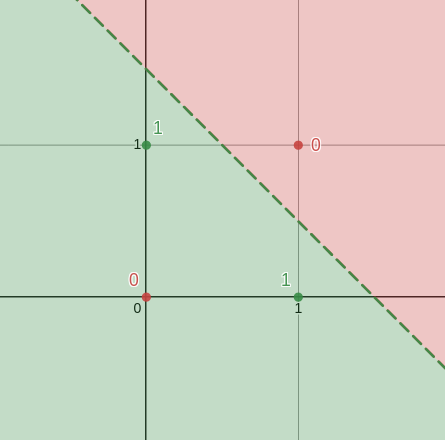

В данном случае понадобится нейронная сеть со слоем, состоящим хотя бы из двух нейронов со step функцией активации.

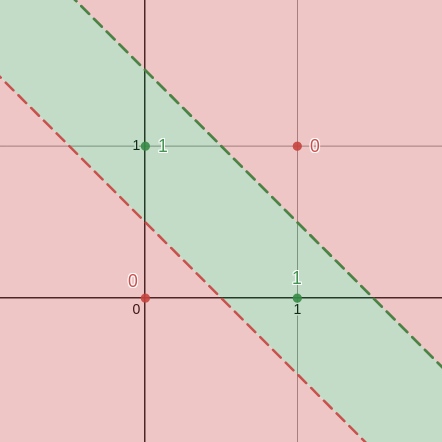

In [ ]:
class XORnet(torch.nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.fc1 = torch.nn.Linear(in_features=2, out_features=2)
    self.fc2 = torch.nn.Linear(in_features=2, out_features=1)
  
  def forward(self, x):
    x = self.fc1(x)
    x = torch.heaviside(x, torch.tensor([0.0]))
    x = self.fc2(x)
    x = torch.heaviside(x, torch.tensor([0.0]))
    return x

xor_net = XORnet()

In [ ]:
xor_net.fc1.weight.data = torch.tensor([[1.5, 1.5],
                                        [-1.0, -1.0]])
xor_net.fc2.weight.data = torch.tensor([[-1.0, -1.0]])

xor_net.fc1.bias.data = torch.tensor([-2.0, 0.5])
xor_net.fc2.bias.data = torch.tensor([0.5])

In [ ]:
print(xor_net(torch.tensor([0.0, 0.0])))
print(xor_net(torch.tensor([0.0, 1.0])))
print(xor_net(torch.tensor([1.0, 0.0])))
print(xor_net(torch.tensor([1.0, 1.0])))

tensor([0.], grad_fn=<NotImplemented>)

tensor([1.], grad_fn=<NotImplemented>)

tensor([1.], grad_fn=<NotImplemented>)

tensor([0.], grad_fn=<NotImplemented>)


Либо понадобится один нейрон с функцией активации (0 if input$^2$ − 1 <= 0; 1 if input$^2$ − 1 > 0).

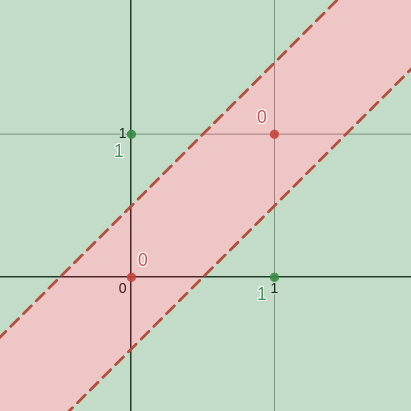

In [ ]:
class NeuronMod(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = torch.nn.Linear(2, 1)

  def forward(self, x):
    return torch.heaviside(self.fc(x) ** 2 - 1, torch.tensor([0.0]))

neuron_mod = NeuronMod()

In [ ]:
neuron_mod.fc.weight.data = torch.tensor([[2.0, -2.0]])
neuron_mod.fc.bias.data = torch.tensor([0.0])

In [ ]:
print(neuron_mod(torch.tensor([0.0, 0.0])))
print(neuron_mod(torch.tensor([0.0, 1.0])))
print(neuron_mod(torch.tensor([1.0, 0.0])))
print(neuron_mod(torch.tensor([1.0, 1.0])))

tensor([0.], grad_fn=<NotImplemented>)

tensor([1.], grad_fn=<NotImplemented>)

tensor([1.], grad_fn=<NotImplemented>)

tensor([0.], grad_fn=<NotImplemented>)


## **Вопрос 1**. Какие нейронные сети могут иметь только линейную разделяющую поверхность?

Нейронные сети, содержащие только линейные функции активации.

## **Вопрос 2**. Имеет ли смысл соединять полносвязанные нейроны (нейроны, которые принимают на вход все выходы предыдущего слоя) с линейной функцией активации в многослойную нейронную сеть?

Нет, поскольку на выходе нейронной сети будет получена линейная комбинация входов нейронной сети со смещением (т. е. то, что могло быть получено при помощи одного нейрона)

# Домашнее задание

Дедлайн домашнего задания - текущее воскресенье 23:59. 

**Домашнее задание 0:** Создайте репозиторий на Github. Вся дальнейшая домашка загружается туда. Чуть позже в телеграм чате будет выложена форма для сдачи.

**Домашнее задание 1:** реализуйте XOR с помощью 3 нейронов. Запишите ответ в виде выражения, состоящего из объектов neuron() – моделей нейрона с пороговой функцией активации, внутри скобок может быть что угодно. Входы верхнего уровня называются x1 и x2. Пример фрагмента записи: neuron(1*x1 + 5*x2 - 0.1) + neuron(x1) (ответ будет выглядеть чуть сложнее, но других символов вроде && не потребуется).

neuron(-1 * neuron(1.5 * x1 + 1.5  * x2 - 2) - 1 * neuron(-1 * x1 -1 * x2 + 0.5) + 0.5)

**Домашнее задание 2:** нарисуйте backward граф для выражения `a*b+c*d`. [Теория и пример оформления](https://www.youtube.com/watch?v=MswxJw-8PvE). Сравните полученные теоретические значения с аттрибутами grad у исходных тензоров.

In [ ]:
a = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([4.0], requires_grad=True)
c = torch.tensor([1.0], requires_grad=True)
d = torch.tensor([5.0], requires_grad=False)

In [ ]:
print(a.grad)

None


In [ ]:
loss = a*b + c*d
loss.backward()

hw_ex_2_autograd.drawio.svg

In [ ]:
print(a.grad)
print(b.grad)
print(c.grad)

tensor([4.])

tensor([2.])

tensor([5.])

None


**Домашнее задание 3:** Поэксперементируйте с размером тензоров, которые влезут на видеоркарту в Colab. Найдите максимальный размер тензора для типа данных float32, float64, float16, int32, int64. На сколько они отличаются.

**Ручной перебор**

In [ ]:
import torch
import numpy as np

In [ ]:
print(f'Allocated: {torch.cuda.memory_allocated()}, reserved: {torch.cuda.memory_reserved()} \n')
! nvidia-smi --query-gpu=memory.total,memory.used --format=csv 

Allocated: 0, reserved: 0 

memory.total [MiB], memory.used [MiB]
16280 MiB, 2 MiB


In [ ]:
def allocate_empty_tensor(dim_size, dtype):
  a=torch.zeros(dim_size, 2048, dtype=dtype, device='cuda')

allocate_empty_tensor(1998335, torch.float32)

In [ ]:
print(f'Allocated: {torch.cuda.memory_allocated()}, reserved: {torch.cuda.memory_reserved()} \n')
! nvidia-smi --query-gpu=memory.total,memory.used --format=csv
torch.cuda.empty_cache()

Allocated: 0, reserved: 16370368512 

memory.total [MiB], memory.used [MiB]
16280 MiB, 16259 MiB


**Перебор циклом**

In [ ]:
import torch
import numpy as np

def allocate_empty_tensor(dim_size, dtype):
  a=torch.zeros(dim_size, 2048, dtype=dtype, device='cuda')

def get_max_tensor_size(start_dim, dtype):
  print(f'Allocated: {torch.cuda.memory_allocated()}, reserved: {torch.cuda.memory_reserved()} \n')
  ! nvidia-smi --query-gpu=memory.total,memory.used --format=csv 
  ok = False
  while not ok:
    print(start_dim)
    try:
      allocate_empty_tensor(start_dim, dtype)
      ok = True
    except RuntimeError:
      start_dim -= 100
  print(f'Allocated: {torch.cuda.memory_allocated()}, reserved: {torch.cuda.memory_reserved()} \n')
  ! nvidia-smi --query-gpu=memory.total,memory.used --format=csv
  torch.cuda.empty_cache()

In [ ]:
get_max_tensor_size(2000000, torch.int32)

Allocated: 0, reserved: 0 

memory.total [MiB], memory.used [MiB]
16280 MiB, 647 MiB
2000000
1999900
1999800
1999700
1999600
1999500
1999400
1999300
1999200
1999100
1999000
1998900
1998800
1998700
1998600
1998500
1998400
1998300
Allocated: 0, reserved: 16370368512 

memory.total [MiB], memory.used [MiB]
16280 MiB, 16259 MiB


**Результаты эксперимента**

*В Google Colab закончилась квота на использование GPU, последующие эксперименты проводились в kaggle*

Тип: float32.  
Размерность тензора: 1998335 x 2048.  
Среда выполнения: Kaggle (16280 MiB VRAM)  
![Screenshot from 2022-12-01 11-25-30.png](attachment:ba3c2dca-f063-449c-b66a-5b46b9bab828.png)

Тип: float64.  
Размерность тензора: 999100 x 2048.  
Среда выполнения: Kaggle (16280 MiB VRAM)  
![Screenshot from 2022-12-01 11-27-56.png](attachment:e714add8-aad5-4bb0-99f5-a5cfb823c064.png)

Тип: float16.  
Размерность тензора: 3996600 x 2048.  
Среда выполнения: Kaggle (16280 MiB VRAM)  
![Screenshot from 2022-12-01 11-28-24.png](attachment:860dcb3e-e27e-4430-b350-50254be5513a.png)

Тип: int64.  
Размерность тензора: 999100 x 2048.  
Среда выполнения: Kaggle (16280 MiB VRAM)  
![Screenshot from 2022-12-01 11-29-32.png](attachment:e12f68b8-006a-4529-bd41-512161c3907a.png)

Тип: int32.  
Размерность тензора: 1998300 x 2048.  
Среда выполнения: Kaggle (16280 MiB VRAM)  
![Screenshot from 2022-12-01 11-29-47.png](attachment:17909962-22b4-4ac9-b381-78a7dad0b2e1.png)

**Домашнее задание 4:** Напишите хороший пример неэффективного кода для занятия памяти видеокарты, который вызовет ошибку out of memory

In [ ]:
import torch

def show_gpu_memory():
    print(f'Allocated: {torch.cuda.memory_allocated()}, reserved: {torch.cuda.memory_reserved()}')
    ! nvidia-smi --query-gpu=memory.total,memory.used --format=csv

def allocate_empty_tensor(dim_size, dtype):
    a = torch.zeros(dim_size, 2048, dtype=dtype, device='cuda')

show_gpu_memory()

dim = 2000
while True:
    try:
        allocate_empty_tensor(dim, torch.float32)
        print(dim, torch.cuda.memory_reserved())
    except RuntimeError as re:
        print(dim)
        print(re)
        break
    dim += 100000
    
show_gpu_memory()

Allocated: 0, reserved: 0
memory.total [MiB], memory.used [MiB]
16280 MiB, 0 MiB
2000 16777216
102000 853540864
202000 2510290944
302000 4984930304
402000 8279556096
502000 12392071168
602000 4932501504
702000 10684989440
802000 6570377216
902000 13960740864
1002000 8210350080
1102000 9028239360
1202000 9848225792
1302000 10666115072
1402000 11486101504
1502000 12306087936
1602000 13123977216
1702000 13943963648
1802000 14763950080
1902000 15581839360
2002000
CUDA out of memory. Tried to allocate 15.28 GiB (GPU 0; 15.90 GiB total capacity; 0 bytes already allocated; 15.27 GiB free; 0 bytes reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
Allocated: 0, reserved: 0
memory.total [MiB], memory.used [MiB]
16280 MiB, 645 MiB


In [ ]:
show_gpu_memory()
allocate_empty_tensor(500000, torch.float32)
show_gpu_memory()
allocate_empty_tensor(670000, torch.float32)
show_gpu_memory()
allocate_empty_tensor(1400000, torch.float32)
show_gpu_memory()

Allocated: 0, reserved: 0
memory.total [MiB], memory.used [MiB]
16280 MiB, 645 MiB
Allocated: 0, reserved: 4097835008
memory.total [MiB], memory.used [MiB]
16280 MiB, 4553 MiB
Allocated: 0, reserved: 9588178944
memory.total [MiB], memory.used [MiB]
16280 MiB, 9789 MiB
Allocated: 0, reserved: 11469324288
memory.total [MiB], memory.used [MiB]
16280 MiB, 11583 MiB


In [ ]:
torch.cuda.empty_cache()

**Домашнее задание 5:** Используя один линейный слой `nn.Linear` и один входной тензор `x` подберите подберите размерности так, чтобы занимать всю видеопамять.
Попробуйте применить линейный слой к тензору `x`. Что произойдет? Кратко опишите ваши эксперименты. Что вы поняли?

In [ ]:
import torch
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def show_gpu_memory():
    print(f'Allocated: {torch.cuda.memory_allocated()}, reserved: {torch.cuda.memory_reserved()}')
    ! nvidia-smi --query-gpu=memory.total,memory.used --format=csv
    
dim = 650000
show_gpu_memory()
x = torch.zeros(dim, 2048, dtype=torch.float32, device='cuda')
show_gpu_memory()
fc = torch.nn.Linear(in_features=2048, out_features=4096).to(device)
show_gpu_memory()

Allocated: 0, reserved: 0
memory.total [MiB], memory.used [MiB]
16280 MiB, 2 MiB
Allocated: 5324800000, reserved: 5326766080
memory.total [MiB], memory.used [MiB]
16280 MiB, 5725 MiB
Allocated: 5358370816, reserved: 5362417664
memory.total [MiB], memory.used [MiB]
16280 MiB, 5759 MiB


In [ ]:
print(fc(x).shape)

show_gpu_memory()

torch.Size([650000, 4096])
Allocated: 5358370816, reserved: 16013852672
memory.total [MiB], memory.used [MiB]
16280 MiB, 15987 MiB


In [ ]:
import torch

def show_gpu_memory():
    print(f'Allocated: {torch.cuda.memory_allocated()}, reserved: {torch.cuda.memory_reserved()}')
    ! nvidia-smi --query-gpu=memory.total,memory.used --format=csv

def allocate_empty_tensor(dim_size, dtype):
  a=torch.zeros(dim_size, 4096, dtype=dtype, device='cuda')


show_gpu_memory()
allocate_empty_tensor(650000, torch.float32)
show_gpu_memory()

Allocated: 0, reserved: 0
memory.total [MiB], memory.used [MiB]
16280 MiB, 0 MiB
Allocated: 0, reserved: 10651435008
memory.total [MiB], memory.used [MiB]
16280 MiB, 10803 MiB


**Результаты эксперимента**

Для начала создадим тензор и слой такой размерности, чтобы остались свободными ~350 Мб видеопамяти. Попробуем прогнать тензор через полученный слой.  
![Screenshot from 2022-12-01 11-48-39.png](attachment:f44b3d13-8f9c-4159-afee-5f52b6497bfd.png)

Видим, что прогон завершился с ошибкой из-за нехватки видеопамяти. Попробуем снизить размерность тензора и повторим вычисления.  
![Screenshot from 2022-12-01 12-40-37.png](attachment:60d0830b-8b93-405b-abcc-e1392cf11735.png)

Видим, что после прогона тензора через слой в памяти было дополнительно зарезервировано около 10.2 GiB. Можно предположить, что для получения результирующего тензора на выходе из слоя в VRAM был выделен соответствующий объём памяти. Но, поскольку результат не сохраняется в переменную, аллоцированный объём памяти остался не изменным. Объём зарезервированной памяти при этом увеличился, поскольку размерность выходного тензора больше размерности входного (занимающего больше всего зарезервированной памяти). В противной случае выходной тензор был бы записан в существующий блок зарезервированной памяти.

Если мы попробуем аллоцировать тензор соответствующего объёма в локальном окружении функции, то увидим, что в результате был зарезервирован схожий объём памяти, что подтверждает наши суждения.  
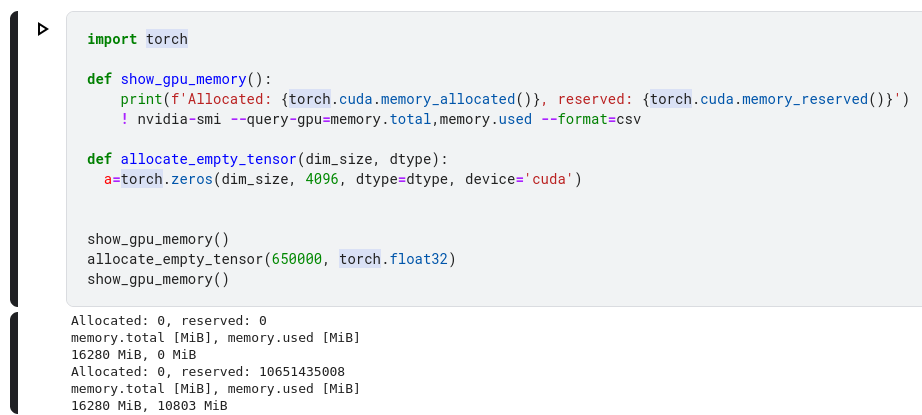

# Рекомендуемые ссылки

- [Нейронные сети и компьютерное зрение, Samsung AI Center, часть 1](https://stepik.org/course/50352/syllabus)
- [Cимулятор](https://playground.tensorflow.org/) нейронов и нейронных сетей